<a href="https://www.kaggle.com/code/ellekayem/data-visualization-with-the-glue-dataset?scriptVersionId=128247246" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Data Visualization

### Analysis by Lauren Main

### Feature Tasks Version 1.0

Using two datasets load and analyze the data.

Summarize your insights. 

Visualize your insights with at least two illustrations per set. 

Table of Contents: 

* [First Look at the Glue Data](#section-one)
* [Note on the Encoders](#section-two)
* [Note on the Models](#section-three)
* [First Conclusions](#section-four)
* [How Do Different Models Score on Tasks? ](#section-five)
* [How are the Scores Improving Over Time? ](#section-six)
* [Final Conclusions](#section-seven)





In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as mtick

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
glue = sns.load_dataset("glue")
glue

,Model,Year,Encoder,Task,Score
0,ERNIE,2019,Transformer,CoLA,75.5
1,T5,2019,Transformer,CoLA,71.6
2,RoBERTa,2019,Transformer,CoLA,67.8
3,BERT,2018,Transformer,CoLA,60.5
4,BiLSTM+ELMo,2018,LSTM,CoLA,32.1
...,...,...,...,...,...
59,BERT,2018,Transformer,RTE,70.1
60,BiLSTM+ELMo,2018,LSTM,RTE,57.4
61,BiLSTM+CoVe,2017,LSTM,RTE,52.7
62,BiLSTM+Attn,2017,LSTM,RTE,58.4


<a id="section-one"></a>
## First Look at the Glue Data

All of the following information researched by Lauren Main. 


In my intial exploration of the dataset, I set up a categorical plot.  

Right away, I noticed that there were some interesting missing pieces in the data.

For example, in 2017 the Transformer did not record any scores.

This was mirrored in 2019 as the LSTM did not record any scores.

In the progression of artificial neural networks, does this reflect progress within the models? 

How are the models scores changing over the 3 year's worth of data collected and is the encoder a signifcant factor in the scores?

<a id="section-two"></a>
**Note:** in my research I discovered that LSTM (introduced in 1997) stands for Long Short-Term Memory, which is AI used in deep learning. It is especially targted at natural language processing because it can maintain a long-term memory of previous inputs and the relationships between those inputs.

LSTM is implemented by memory cells and gates that regulate the flow of information. The gates can either allow or block information from entering or leaving the memory cells, depending on their importance to the network's output. This enables LSTMs to selectively remember or forget information from previous inputs, allowing them to handle long-term dependencies more effectively.

Developing and implementing LSTM has been in progress since the 2000s. 

Additionally, the Transformer type of encoder was developed and implemented in 2017, also focused on natural language processing. 

It is implemented by self-attention and feedforward neural network. Self-attention is a mechanism that allows the model to weigh the importance of different positions in the input sequence when encoding it. It computes a weighted sum of the inputs, where the weights are learned based on the similarity between each position and all other positions in the sequence. 

The Transformer encoder is designed to be highly parallelizable, which makes it efficient to train on large-scale datasets.

<a id="section-three"></a>
**Note on the models in this dataset:**

+ ERNIE; Enhanced Representation through Knowledge Integration, developed by Baidu

+ T5; Text-to-Text Transfer Transformer (and not Terminator, haha), developed by Google

+ RoBERTa; Robustly Optimized BERT Pretraining Approach; based on BERT and developed by Facebook AI

+ BERT; Bidirectional Encoder Representations from Transformers; developed by Google

+ BiLSTM+ELMo; Bidirectional Long Short-Term Memory with ELMo

+ BiLSTM; Bidirectional Long Short-Term Memory

+ BiLSTM+CoVe; Contextualized Word Embeddings

+ BiLSTM+Attn; Bidirectional LSTM with Attention

You may be wondering if ChatGPT is based on any of these models...and the answer is: 

GPT which stands for "Generative Pretrained Transformer", is a type of transformer model that uses a language model pre-training approach, similar to BERT, RoBERTa, and the other models in this dataset. 

However, ChatGPT is not specifically based on BiLSTM, BiLSTM+CoVe, or BiLSTM+Attn.


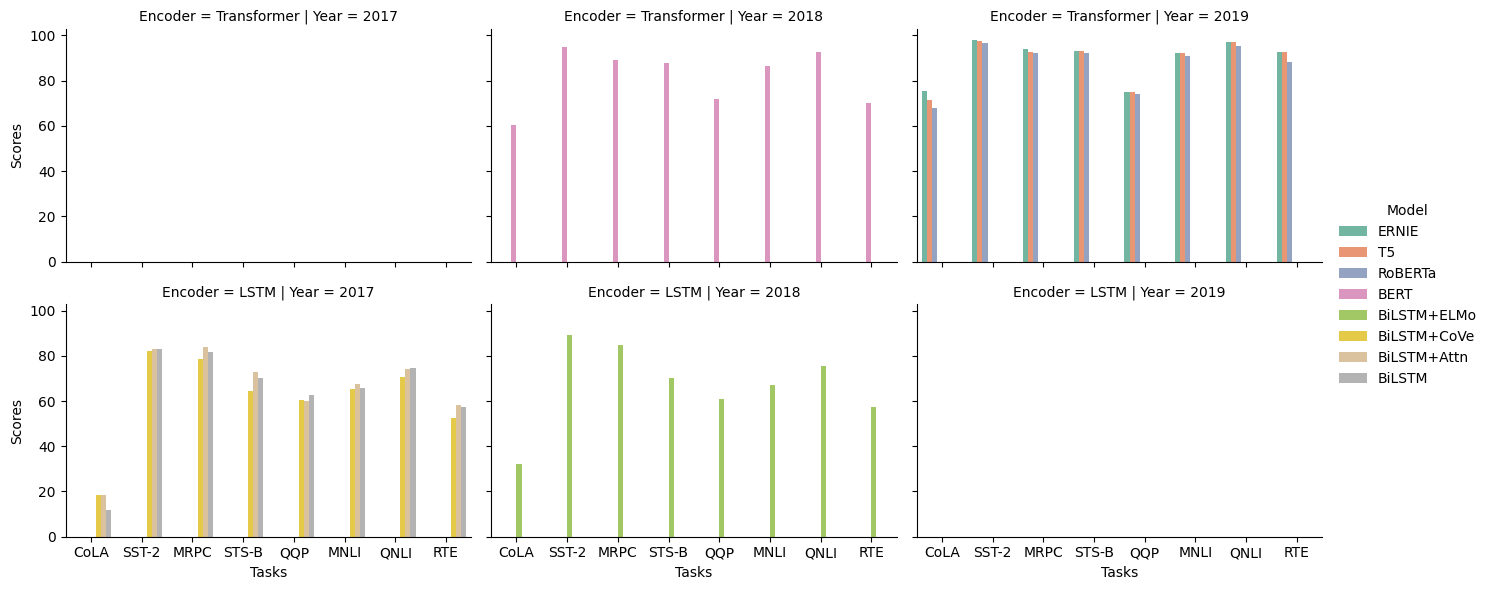

In [3]:
glue_df = sns.catplot(
data= glue,
kind = 'bar',
x = 'Task',
y ='Score',
hue = 'Model',
col = 'Year',
row = 'Encoder',
height=3,
aspect = 1.5,
palette='Set2')

glue_df.set_axis_labels('Tasks', 'Scores')
glue_df

<a id="section-four"></a>
## First Conclusions

At the start of this dataset, the Transformer encoder is not being used.  

However, later on LSTM is not being used and the Transformer encoder is being used by most models. 

The 2018 dataset is only represented by two models, each using different encoders. 

Each model is being given tasks over the years including: 

1. CoLA (Corpus of Linguistic Acceptability): a dataset for evaluating language models' ability to predict whether a given sentence is grammatically correct or not.

2. SST-2 (Stanford Sentiment Treebank): a dataset for evaluating language models' ability to classify the sentiment of a given sentence as either positive or negative.

3. MRPC (Microsoft Research Paraphrase Corpus): a dataset for evaluating language models' ability to identify whether two given sentences are semantically equivalent or not.

4. STS-B (Semantic Textual Similarity Benchmark): a dataset for evaluating language models' ability to estimate the degree of semantic similarity between two given sentences.

5. QQP (Quora Question Pairs): a dataset for evaluating language models' ability to identify whether two given questions are semantically equivalent or not.

6. MNLI (Multi-Genre Natural Language Inference): a dataset for evaluating language models' ability to perform natural language inference, i.e., to determine whether a given hypothesis is entailed, contradicted, or neutral with respect to a given premise.

7. QNLI (Question-answering Natural Language Inference): a variant of the MNLI dataset, with questions as premises and answers as hypotheses.

8. RTE (Recognizing Textual Entailment): a dataset for evaluating language models' ability to perform textual entailment, i.e., to determine whether a given hypothesis is entailed or not by a given premise.

<a id="section-five"></a>
## How Do Different Models Score on Tasks? 

While the above illustration helps us understand more about what the data looks like, it would be more interesting to see the trend of the model's scores in each task. In the time of ChatGPT, let's check out the data from 4 years ago.

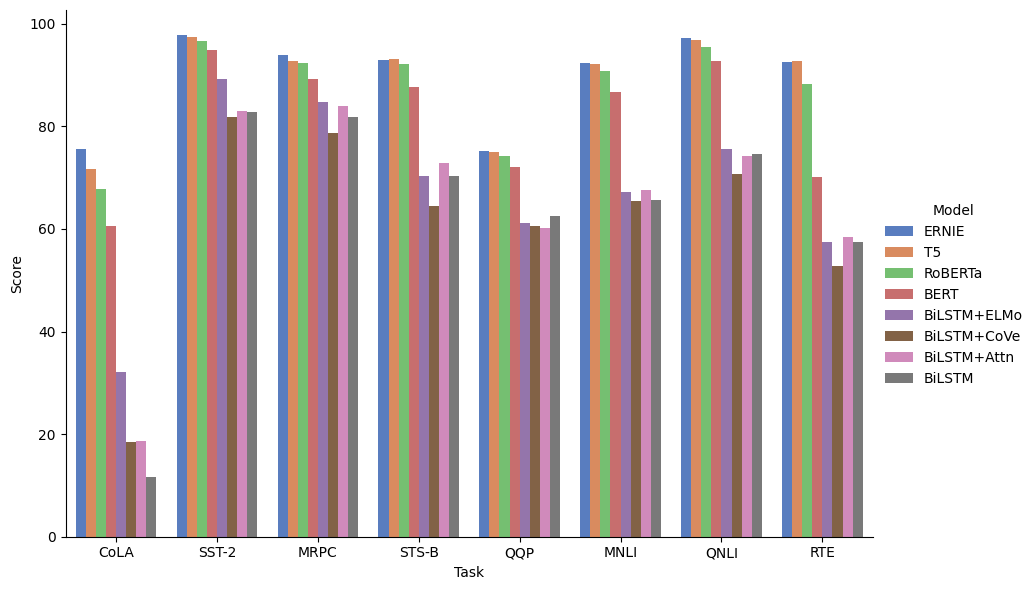

In [4]:
sns.catplot(
    data=glue,
    x='Task',
    y='Score',
    kind='bar',
   errorbar=None,
    estimator='mean',
    palette='muted',
    hue='Model',
    height=6,
    aspect=1.5
)
sns.despine()

<a id="section-six"></a>
## How are the Scores Improving Over Time? 

Can we see them visual improve over time if we create a scatter plot? 



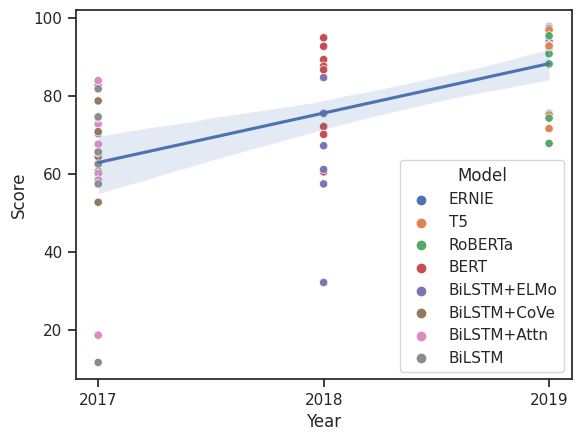

In [5]:
sns.set_theme(style="ticks")

# Create scatter plot
scatter_plot = sns.scatterplot(data=glue, x="Year", y="Score", hue="Model")

# Add regression line
sns.regplot(data=glue, x="Year", y="Score", scatter=False)

# Set the x-axis tick labels to display integers
scatter_plot.xaxis.set_major_locator(mtick.MaxNLocator(integer=True))



<a id="section-seven"></a>
## Final Conclusions

While this is a fascinating dataset, when you visualize this as a heatmap, you can really understand the gaps in data. 

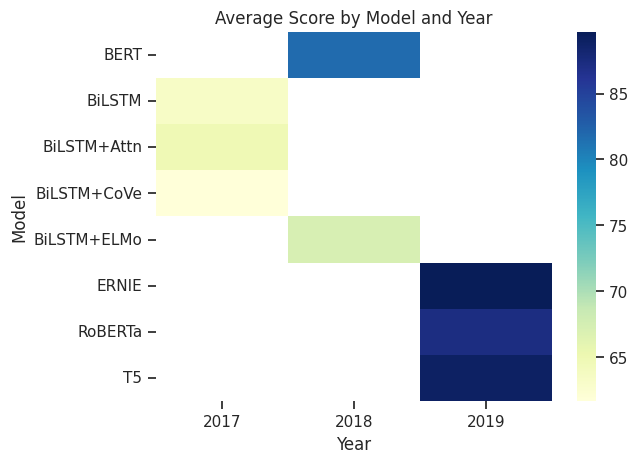

In [6]:
# Create a pivot table with the mean of the score for each model and year combination
pivot_table = glue.pivot_table(values='Score', index='Model', columns='Year', aggfunc='mean')

# Create the heatmap
sns.heatmap(pivot_table, cmap='YlGnBu')

# Add a title
plt.title('Average Score by Model and Year')

# Show the plot
plt.show()